In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
from keras import regularizers
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

# Scales the training and test data to range between 0 and 1.
max_value = float(x_train.max())
x_train = x_train.astype('float32') / max_value
x_test = x_test.astype('float32') / max_value
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

11501568/11490434 [==============================] - 1s 0us/step


In [0]:
x_train_noisy = x_train + np.random.normal(loc=0.0, scale=0.5, size=x_train.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = x_test + np.random.normal(loc=0.0, scale=0.5, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [4]:
autoencoder = Sequential()

autoencoder.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2,2), padding='same'))
autoencoder.add(Conv2D(32, (3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2,2), padding='same'))

autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        9248      
__________

In [5]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=128, validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1651 - val_loss: 0.1170
Epoch 2/50
60000/60000 [==============================] - 181s 3ms/step - loss: 0.1142 - val_loss: 0.1094
Epoch 3/50
60000/60000 [==============================] - 185s 3ms/step - loss: 0.1086 - val_loss: 0.1058
Epoch 4/50
60000/60000 [==============================] - 184s 3ms/step - loss: 0.1056 - val_loss: 0.1035
Epoch 5/50
60000/60000 [==============================] - 184s 3ms/step - loss: 0.1037 - val_loss: 0.1020
Epoch 6/50
60000/60000 [==============================] - 178s 3ms/step - loss: 0.1023 - val_loss: 0.1012
Epoch 7/50
60000/60000 [==============================] - 179s 3ms/step - loss: 0.1011 - val_loss: 0.0999
Epoch 8/50
60000/60000 [==============================] - 177s 3ms/step - loss: 0.1002 - val_loss: 0.0989
Epoch 9/50
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0994 - val_loss: 0.0

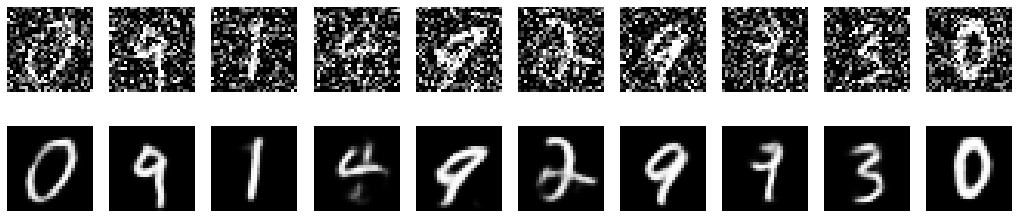

In [9]:
num_images = 10
x_test_denoised = autoencoder.predict(x_test_noisy)
random_test_images = np.random.randint(x_test.shape[0], size=num_images)

plt.figure(figsize=(18, 4))

for i, image_idx in enumerate(random_test_images):
    # plot original image
    ax = plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test_noisy[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # plot reconstructed image
    ax = plt.subplot(2, num_images, num_images + i + 1)
    plt.imshow(x_test_denoised[image_idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()